In [4]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
import matplotlib.colors as colors

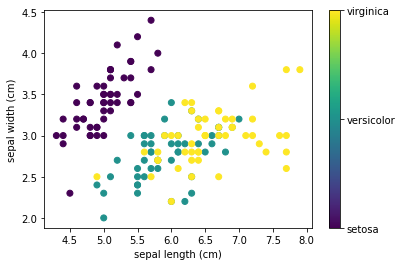

In [9]:
iris=datasets.load_iris()
# Exploring iris dataset
x_index = 0
y_index = 1
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

In [105]:
def train_validate_test_split(data_np,testRatio=0.3, valRatio=0.3):
    np.random.seed(1)
    perm=np.random.permutation(data_np.index)
    m=len(data_np.index)
    testEnd = int(testRatio * m)
    validateEnd = int(valRatio * m) + testEnd
    testSet = data_np.iloc[perm[:testEnd]]
    validateSet = data_np.iloc[perm[testEnd:validateEnd]]
    trainSet = data_np.iloc[perm[validateEnd:]]
    return trainSet, validateSet, testSet
# def train_validate_test_split_NQ(data,labels, testRatio =0.3, valRatio =0.3):
#     validationEnd=int(data.shape[0]*valRatio)
#     testEnd=validationEnd+int(data.shape[0]*testRatio)
#     validationX=data[0:validationEnd]
#     testX=data[validationEnd:testEnd]
#     trainX=data[testEnd:]
#     validationY=labels[0:validationEnd]
#     testY=labels[validationEnd:testEnd]
#     trainY=labels[testEnd:]
#     return trainX,testX,validationX,trainY,testX,validationX

In [163]:
#convert iris to dataframe
irispd = pd.DataFrame(data=iris.data, columns=iris['feature_names'])
irispd["target"] = iris.target
train, validate, test = train_validate_test_split(irispd)

X_train=train.loc[:, train.columns!='target']
y_train = train[["target"]]

X_validate = validate.loc[:, train.columns!='target']
y_validate = validate[["target"]]

X_test = test.loc[:, train.columns!='target']
y_test = test["target"]


In [165]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)
modelNB.score(X_validate,y_validate)

y_pred = modelNB.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


C:\Users\002\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [164]:
def accuracy_score(y_test, y_pred):
    wrong_pred=0
    for yp,yt in zip(y_pred,y_test):
        if yp==yt:
            continue
        else:
    #         print(yp,yt)
            wrong_pred+=1
    accuracy=(y_pred.size-wrong_pred)/(y_pred.size)*100
    return accuracy
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",str(Accuracy))

Accuracy: 95.55555555555556


In [213]:
import seaborn as sns
iriss = sns.load_dataset("iris")


In [214]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

In [215]:
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

In [216]:
from scipy.stats import norm
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)


C:\Users\002\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


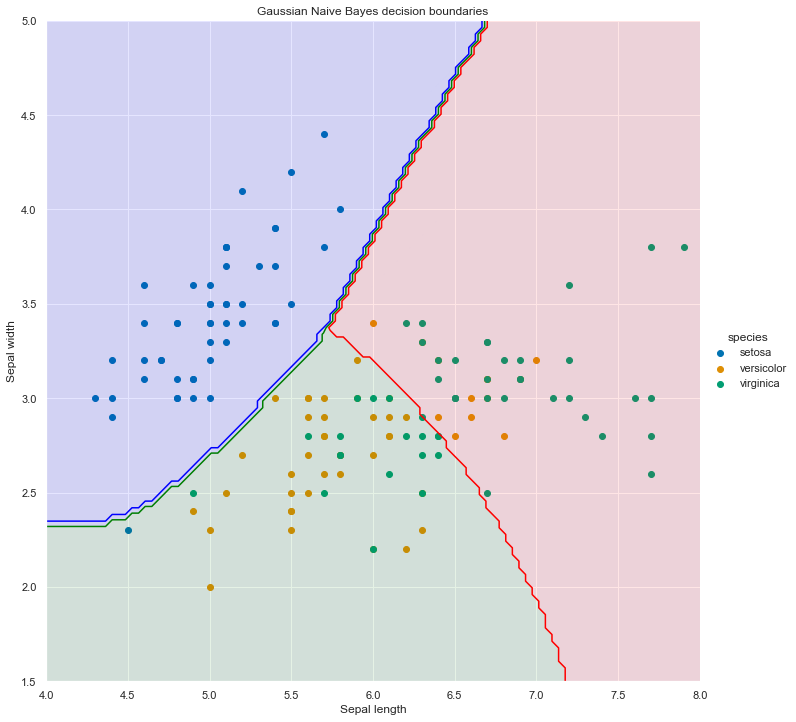

In [218]:
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iriss, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "sepal_length", "sepal_width",)  .add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()
